In [1]:
# Imports & Setup:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

In [2]:
# function to load in and process images
def load_image(path):
    images = Image.open(f'./../CUB_200_2011/images/{path}') 
    new_image=images.resize((128,128))
    color_image=new_image.convert("RGB")
    arrays1 = np.asarray(color_image)
    floaters= arrays1.astype('float32')
    floaters2=floaters/255.0
    return floaters2

In [3]:
class_map_dir= pd.read_csv('Tables/class_map_dir_output_new_classes_f.csv')

In [4]:
class_map_dir_train=class_map_dir.loc[class_map_dir['Is Training Image']==1]
list_of_images_train=[load_image(i) for i in class_map_dir_train['Image Name']]
array_of_img_train=np.asarray(list_of_images_train)
list_of_labels_train=class_map_dir_train['Order_Num_Seq']

In [5]:
class_map_dir_test=class_map_dir.loc[class_map_dir['Is Training Image']==0]
list_of_images_test=[load_image(i) for i in class_map_dir_test['Image Name']]
array_of_img_test=np.asarray(list_of_images_test)
list_of_labels_test=class_map_dir_test['Order_Num_Seq']

In [53]:
# Add in flipped images for training set

def flip_image(i):
    return tf.image.flip_left_right(i)

list_of_images_train_flipped=[flip_image(i) for i in list_of_images_train]
array_of_img_train_flipped=np.asarray(list_of_images_train_flipped)
list_of_labels_train_flipped=class_map_dir_train['Order_Num_Seq']

print(len(array_of_img_train))
print(len(array_of_img_train_flipped))

print(len(list_of_labels_train))
print(len(list_of_labels_train_flipped))

all_train_labels=list_of_labels_train.append(list_of_labels_train_flipped)
all_train_images=np.concatenate((array_of_img_train,array_of_img_train_flipped))
print(len(all_train_labels))
print(len(all_train_images))

ResourceExhaustedError: OOM when allocating tensor with shape[128,128,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:ReverseV2]

In [52]:
# Add in rotated images for training set

def rotate_image(i):
    return tf.keras.preprocessing.image.random_rotation(
    x=i, rg=45, row_axis=1, col_axis=2, channel_axis=0, fill_mode='nearest',
    cval=0.0, interpolation_order=1)

list_of_images_train_rotated=[rotate_image(i) for i in list_of_images_train]
array_of_img_train_rotated=np.asarray(list_of_images_train_rotated)
list_of_labels_train_rotated=class_map_dir_train['Order_Num_Seq']

print(len(array_of_img_train))
print(len(array_of_img_train_rotated))

print(len(list_of_labels_train))
print(len(list_of_labels_train_rotated))

all_train_labels2=list_of_labels_train.append(list_of_labels_train_rotated)
all_train_images2=np.concatenate((array_of_img_train,array_of_img_train_rotated))
print(len(all_train_labels2))
print(len(all_train_images2))

5994
5994
5994
5994


MemoryError: Unable to allocate 2.20 GiB for an array with shape (11988, 128, 128, 3) and data type float32

In [18]:
list_of_images_train_flipped=[flip_image(i) for i in list_of_images_train]
array_of_img_train_flipped=np.asarray(list_of_images_train_flipped)
list_of_labels_train_flipped=class_map_dir_train['Order_Num_Seq']

In [20]:
print(len(array_of_img_train))
print(len(array_of_img_train_flipped))

print(len(list_of_labels_train))
print(len(list_of_labels_train_flipped))

5994
5994
5994
5994


In [31]:
all_train_labels=list_of_labels_train.append(list_of_labels_train_flipped)


In [33]:
all_train_images=np.concatenate((array_of_img_train,array_of_img_train_flipped))

In [34]:
print(len(all_train_labels))
print(len(all_train_images))

11988
11988


In [36]:
# Prep for NN inputs

X_train_alt=all_train_images
y_train_alt=all_train_labels

X_test_alt=array_of_img_test
y_test_alt=list_of_labels_test

X_train_alt = X_train_alt.reshape(X_train_alt.shape[0], 128, 128, 3)
X_test_alt = X_test_alt.reshape(X_test_alt.shape[0], 128, 128, 3)
y_train_alt = utils.to_categorical(y_train_alt,13)
y_test_alt = utils.to_categorical(y_test_alt,13)

In [37]:
#will this work?
model_alt = Sequential()
model_alt.add(Flatten(input_shape = (128, 128, 3)))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(256, activation = 'relu'))

model_alt.add(Dense(13, activation = 'softmax'))
# Compile model.
model_alt.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt  = model_alt.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
47/47 [==============================] - 8s 160ms/step - loss: 9.5296 - accuracy: 0.4964 - val_loss: 2.4117 - val_accuracy: 0.6747
Epoch 2/50
47/47 [==============================] - 7s 149ms/step - loss: 1.5412 - accuracy: 0.6507 - val_loss: 1.3009 - val_accuracy: 0.6740
Epoch 3/50
47/47 [==============================] - 7s 153ms/step - loss: 1.2698 - accuracy: 0.6632 - val_loss: 1.2265 - val_accuracy: 0.6735
Epoch 4/50
47/47 [==============================] - 8s 173ms/step - loss: 1.2384 - accuracy: 0.6662 - val_loss: 1.2164 - val_accuracy: 0.6767
Epoch 5/50
47/47 [==============================] - 9s 186ms/step - loss: 1.2143 - accuracy: 0.6665 - val_loss: 1.2226 - val_accuracy: 0.6755
Epoch 6/50
47/47 [==============================] - 9s 187ms/step - loss: 1.1868 - accuracy: 0.6739 - val_loss: 1.3297 - val_accuracy: 0.6239
Epoch 7/50
47/47 [==============================] - 8s 179ms/step - loss: 1.2051 - accuracy: 0.6664 - val_loss: 1.1966 - val_accuracy: 0.6793
Epoch 

In [11]:
def flip_image(i):
    return tf.image.flip_left_right(i)

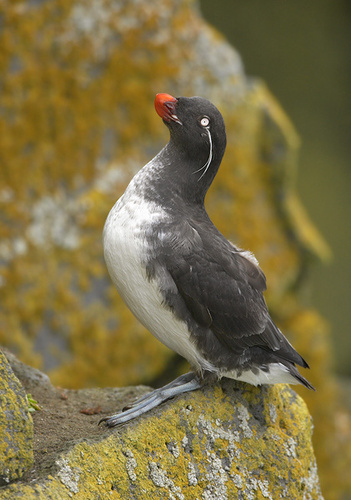

In [49]:
image_test = Image.open("./../CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0064_795954.jpg")
image_test2 = np.asarray(image_test)
ex2=np.array(image_test2)
pilImage_flipped = Image.fromarray(ex2)
pilImage_flipped

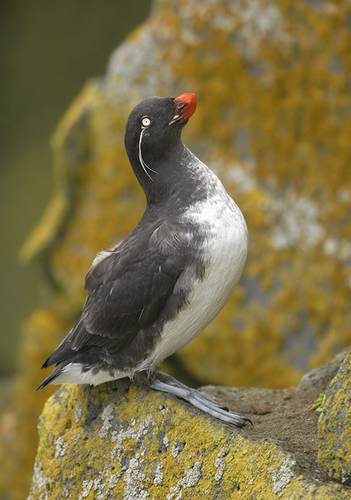

In [50]:
image_test = Image.open("./../CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0064_795954.jpg")
image_test2 = np.asarray(image_test)
ex2=np.array(flip_image(image_test2))
pilImage_flipped = Image.fromarray(ex2)
pilImage_flipped

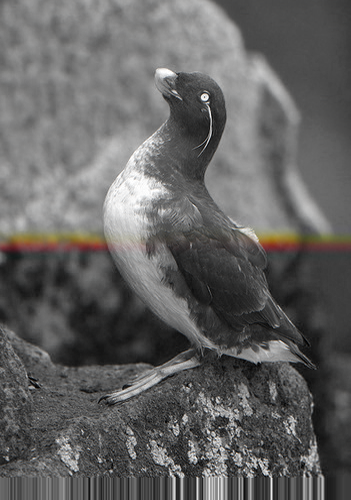

In [61]:
def rotate_image(i):
    return tf.keras.preprocessing.image.random_rotation(
    x=i, rg=20, row_axis=1, col_axis=2, channel_axis=1, fill_mode='nearest',
    cval=0.0, interpolation_order=2)

image_test = Image.open("./../CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0064_795954.jpg")
image_test2 = np.asarray(image_test)
ex2=np.array(rotate_image(image_test2))
pilImage_flipped = Image.fromarray(ex2)
pilImage_flipped

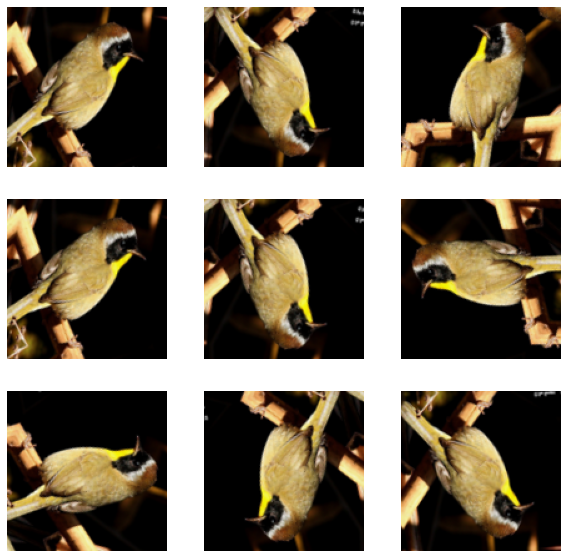

In [64]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

image = X_train_alt[5]
image = tf.expand_dims(X_train_alt[-1], 0)
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")